In [1]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 


In [2]:
phase='science_phase' # calval_phase or science_phase
simu='eNATL60-BLB002' # or eNATL60-BLBT02
data='karin' # or nadir

In [3]:
latminN=30
latmaxN=40
lonminN=-55
lonmaxN=-40


In [4]:
latminM=35.1
latmaxM=44.4
lonminM=-5.7
lonmaxM=9.6


In [5]:
tdir='/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_'+phase+'/'+simu+'-SSH-1h/'+data
files=glob.glob(tdir+'/*/*nc')

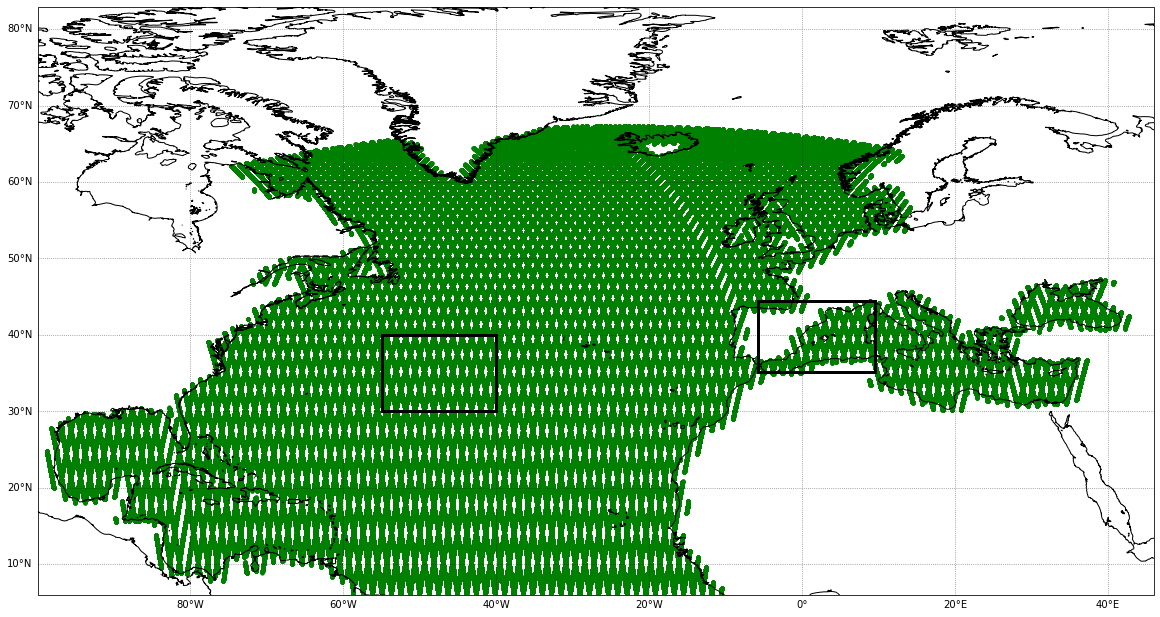

In [6]:
fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((-100, 46, 6, 67))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminN, lonminN], [latminN, latmaxN],color='black',linewidth=3)
ax.plot([lonmaxN, lonmaxN], [latminN, latmaxN],color='black',linewidth=3)
ax.plot([lonminN, lonmaxN], [latminN, latminN],color='black',linewidth=3)
ax.plot([lonminN, lonmaxN], [latmaxN, latmaxN],color='black',linewidth=3)    
ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3)
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3)
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3)
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3)    

for f in np.arange(len(files)):
    file=files[f]
    nfile=file.split('/')[-1]
    nnfile=nfile.split('.')[0]
    filename='/work/ALT/odatis/eNATL60/alberta/SWOT-sim/'+phase+'/latlon_debut_track_'+nnfile+'.npz'
    if os.path.exists(filename):
        spec = np.load('/work/ALT/odatis/eNATL60/alberta/SWOT-sim/'+phase+'/latlon_debut_track_'+nnfile+'.npz')
        lat_read = spec['lat_nonan'];
        lon_read = spec['lon_nonan'];
        plt.scatter(lon_read,lat_read, c='g', linewidth=0, s=18);
